## Which animals/breeds are the most adopted? Statistical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
dallas_data = pd.read_csv('Project1/Resources/DallasMergedClean.csv', 
                          dtype={'Council District': 'string', 'Intake Total': 'string', 'Outcome Subtype': 'string'})
#pf_data = pd.read_csv('Project1/Resources/Animals.csv')

In [3]:
# All adopted animal types
dal_adopted = dallas_data.loc[(dallas_data['Outcome Type'] == 'RETURNED TO OWNER') 
                            | (dallas_data['Outcome Type'] == 'ADOPTION'), 
                              ['Outcome Type','Animal Type', 'Animal Breed']]
dal_adopted 

,Outcome Type,Animal Type,Animal Breed
4,RETURNED TO OWNER,CAT,DOMESTIC SH
22,RETURNED TO OWNER,DOG,BORDER COLLIE
33,RETURNED TO OWNER,DOG,POMERANIAN
34,RETURNED TO OWNER,DOG,SHEPHERD MIX
36,ADOPTION,CAT,DOMESTIC SH
...,...,...,...
172193,RETURNED TO OWNER,DOG,ROTTWEILER
172196,RETURNED TO OWNER,DOG,PIT BULL
172199,RETURNED TO OWNER,DOG,CHIHUAHUA SH
172200,RETURNED TO OWNER,DOG,SCHNAUZER STAND


In [4]:
# Creating dataframe for animal type adopted bar chart
adopt_count = dal_adopted.groupby('Animal Type').count()
adopt_count = adopt_count.drop(columns='Animal Breed')
adopt_count = adopt_count.rename(columns={'Outcome Type':'Total Adopted'})
dal_count = dallas_data.groupby('Animal Type').count()
adopt_count['Total Available'] = dal_count['Outcome Type']
adopt_count['Percent Adopted'] = (adopt_count['Total Adopted'] / adopt_count['Total Available']) * 100
adopt_count['Percent Adopted'] = adopt_count['Percent Adopted'].map("{:.2f}%".format)
adopt_count

,Total Adopted,Total Available,Percent Adopted
Animal Type,,,
BIRD,73,1860,3.92%
CAT,12172,39386,30.90%
DOG,69665,125208,55.64%
LIVESTOCK,24,139,17.27%
WILDLIFE,852,5610,15.19%


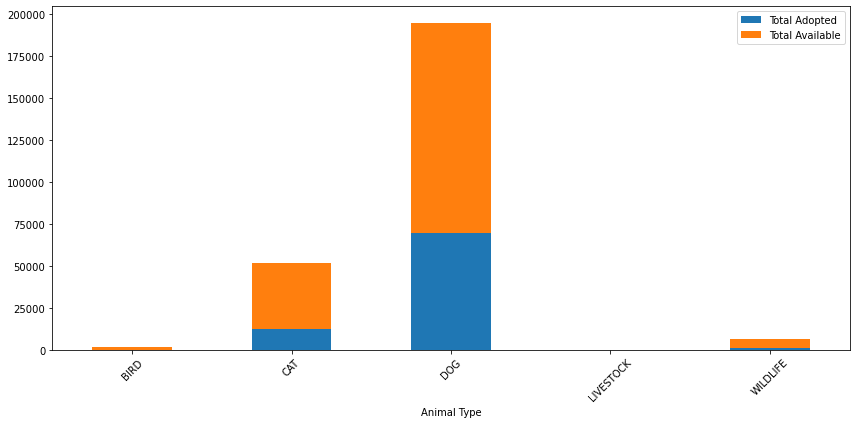

In [5]:
adopt_count.plot(kind="bar", stacked=True, rot=45, figsize=(12,6))
plt.tight_layout()
plt.show()

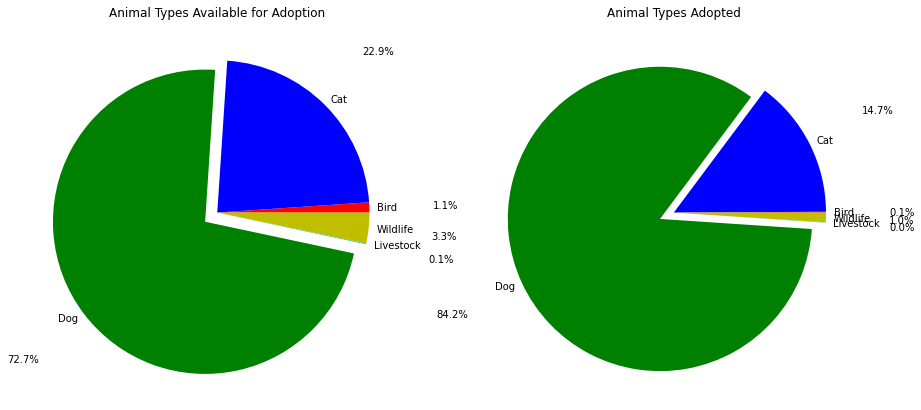

In [6]:
colors = ['r', 'b', 'g', 'c', 'y']
labels = ['Bird','Cat','Dog','Livestock','Wildlife']

#ax1,ax2 refer to two pies - 1, 2 is 1 row, 2 columns; 2, 1 is 2 rows, 1 column
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15)) 

# Pie showing total number of animal types available for adoption
ax1.pie(adopt_count['Total Available'], colors=colors, labels=labels, labeldistance=1.05, 
        explode=(0, 0, 0.1, 0, 0), autopct="%1.1f%%", pctdistance=1.5)
#for wedge in ax1[0]:
#    wedge.set_edgecolor('white')
ax1.set_title("Animal Types Available for Adoption")

# Pie showing total number of animal types adopted
ax2.pie(adopt_count['Total Adopted'], colors=colors, labels=labels, labeldistance=1.05, 
        explode=(0, 0, 0.1, 0, 0), autopct="%1.1f%%", pctdistance=1.5)
#for wedge in adopt_pie[0]:
#    wedge.set_edgecolor('white')
ax2.set_title("Animal Types Adopted")

plt.show()

## Dogs are by far the most animal available for adoption (72.71%), followed by cats (22.87%).

In [7]:
# Creating dataframe for dog breed adoptions
dogs_only = dal_adopted.loc[dal_adopted['Animal Type'] == 'DOG']
dog_group = dogs_only.groupby(['Animal Type', 'Animal Breed']).count()
dog_group = dog_group.sort_values(by='Outcome Type', ascending=False)
dog_group = dog_group.rename(columns={'Outcome Type':'Total Adopted'})

# Finds top 10 breeds
dog_group = dog_group.iloc[0:10, :]
dog_group

Total Adopted
Animal Type Animal Breed                  
DOG         PIT BULL                 13718
            CHIHUAHUA SH             10735
            GERM SHEPHERD             8841
            LABRADOR RETR             8405
            CAIRN TERRIER             2250
            ALASKAN HUSKY             1545
            SHIH TZU                  1212
            ROTTWEILER                1149
            AUST CATTLE DOG           1061
            BOXER                     1042

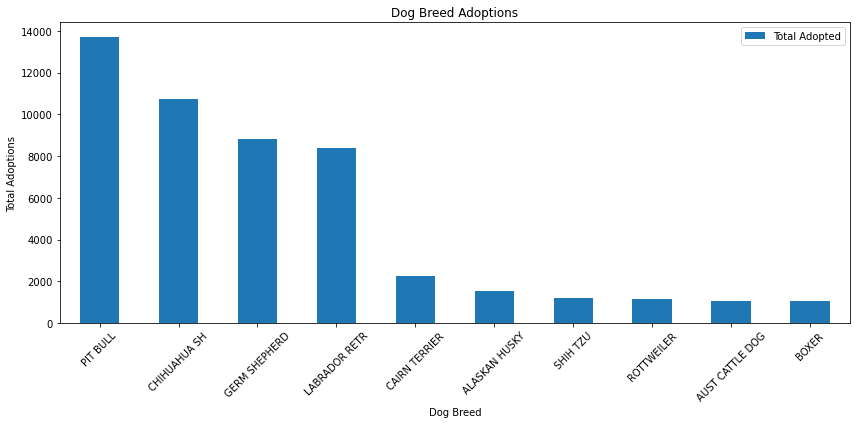

,Animal Type,Total Adopted
Animal Breed,,
PIT BULL,DOG,13718
CHIHUAHUA SH,DOG,10735
GERM SHEPHERD,DOG,8841
LABRADOR RETR,DOG,8405
CAIRN TERRIER,DOG,2250
ALASKAN HUSKY,DOG,1545
SHIH TZU,DOG,1212
ROTTWEILER,DOG,1149
AUST CATTLE DOG,DOG,1061


In [8]:
dog_bar = dog_group.reset_index(level=[0,1])
dog_bar.set_index('Animal Breed',drop=True,inplace=True)

dog_bar.plot(kind="bar", rot=45, figsize=(12,6))
plt.title("Dog Breed Adoptions")
plt.xlabel("Dog Breed")
plt.ylabel("Total Adoptions")

plt.tight_layout()
plt.show()
dog_bar

In [24]:
avail_dogs = dallas_data.loc[dallas_data['Animal Type'] == 'DOG']
avail_dogs = avail_dogs[['Animal Type', 'Animal Breed', 'Outcome Type']]
#avail_dog_group = avail_dogs.groupby(['Animal Type', 'Animal Breed']).count()
#avail_dog_group.sort_values(b)
avail_dogs
#avail_dogs.groupby(['Animal Type', 'Animal Breed']).count()
#dog_group = dogs_only.groupby(['Animal Type', 'Animal Breed']).count()
#dog_group = dog_group.sort_values(by='Outcome Type', ascending=False)
#dog_group = dog_group.rename(columns={'Outcome Type':'Total Adopted'})


,Animal Type,Animal Breed,Outcome Type
0,DOG,LABRADOR RETR,EUTHANIZED
1,DOG,PIT BULL,TRANSFER
2,DOG,PIT BULL,EUTHANIZED
5,DOG,GERM SHEPHERD,EUTHANIZED
6,DOG,LABRADOR RETR,EUTHANIZED
...,...,...,...
172198,DOG,LABRADOR RETR,TREATMENT
172199,DOG,CHIHUAHUA SH,RETURNED TO OWNER
172200,DOG,SCHNAUZER STAND,RETURNED TO OWNER
172202,DOG,GERM SHEPHERD,LOST EXP


In [9]:
# Creating dataframe for cat breed adoptions
cats_only = dal_adopted.loc[dal_adopted['Animal Type'] == 'CAT']
cat_group = cats_only.groupby(['Animal Type', 'Animal Breed']).count()
cat_group = cat_group.sort_values(by='Outcome Type', ascending=False)

# Finds top 10 breeds
cat_group = cat_group.iloc[0:10, :]

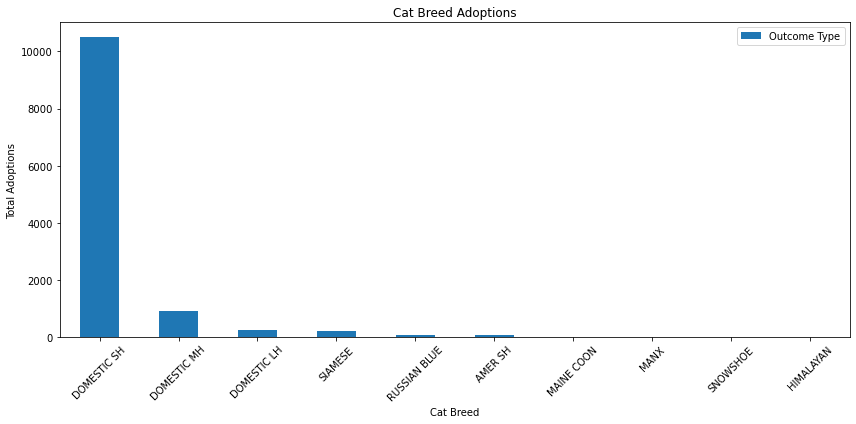

,Animal Type,Outcome Type
Animal Breed,,
DOMESTIC SH,CAT,10490
DOMESTIC MH,CAT,938
DOMESTIC LH,CAT,270
SIAMESE,CAT,206
RUSSIAN BLUE,CAT,81
AMER SH,CAT,80
MAINE COON,CAT,30
MANX,CAT,11
SNOWSHOE,CAT,10


In [10]:
cat_bar = cat_group.reset_index(level=[0,1])
cat_bar.set_index('Animal Breed',drop=True,inplace=True)

cat_bar.plot(kind="bar", rot=45, figsize=(12,6))
plt.title("Cat Breed Adoptions")
plt.xlabel("Cat Breed")
plt.ylabel("Total Adoptions")

plt.tight_layout()
plt.show()
cat_bar

## The most adopted breeds for dogs are Pit Bulls, Chihuahuas, German Shepards and Labrador Retrievers.  The most adopted breeds for cats are Domestic Shorthair by far.  

### Null Hypothesis:
### Alternate Hypothesis: